In [95]:
import pandas as pd
import numpy as np

In [96]:
data1 = pd.read_csv("../data/data1.csv")

## data5 - Product ID

In [97]:
def turn_percentage(x):
    return '%.2f%%' % (x * 100);

In [136]:
data5 = data1.groupby(['category_id', "product_id", 'event_type']).agg({'event_type':'count'})
data5 = data5.unstack()
data5.reset_index(inplace=True)
data5.columns = ["category_id","product_id", "cart","purchase","remove_from_cart","view"]

data5= data5.fillna(0)

data5["View-Cart%"] = (data5["cart"]/data5["view"]).apply(turn_percentage)
data5["Cart-Purchase%"] = (data5["purchase"]/data5["cart"]).apply(turn_percentage)
data5["View-Purchase%"] = (data5["purchase"]/data5["view"]).apply(turn_percentage)
data5["Cart-Remove%"] = (data5["remove_from_cart"]/data5["cart"]).apply(turn_percentage)

data5["View-Cart"] = data5["cart"]/data5["view"]
data5["Cart-Purchase"] = data5["purchase"]/data5["cart"]
data5["View-Purchase"] = data5["purchase"]/data5["view"]
data5["Cart-Remove"] = data5["remove_from_cart"]/data5["cart"]

data5

,category_id,product_id,cart,purchase,remove_from_cart,view,View-Cart%,Cart-Purchase%,View-Purchase%,Cart-Remove%,View-Cart,Cart-Purchase,View-Purchase,Cart-Remove
0,1487580004807082827,5916194,3.0,1.0,1.0,32.0,9.38%,33.33%,3.12%,33.33%,0.093750,0.333333,0.031250,0.333333
1,1487580004807082827,5916195,8.0,3.0,2.0,61.0,13.11%,37.50%,4.92%,25.00%,0.131148,0.375000,0.049180,0.250000
2,1487580004832248652,5706112,0.0,0.0,0.0,6.0,0.00%,nan%,0.00%,nan%,0.000000,NaN,0.000000,NaN
3,1487580004832248652,5706113,63.0,5.0,50.0,243.0,25.93%,7.94%,2.06%,79.37%,0.259259,0.079365,0.020576,0.793651
4,1487580004832248652,5706114,73.0,8.0,50.0,130.0,56.15%,10.96%,6.15%,68.49%,0.561538,0.109589,0.061538,0.684932
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56184,2242903426784559183,5929661,0.0,0.0,0.0,9.0,0.00%,nan%,0.00%,nan%,0.000000,NaN,0.000000,NaN
56185,2242903426784559183,5929662,5.0,0.0,3.0,22.0,22.73%,0.00%,0.00%,60.00%,0.227273,0.000000,0.000000,0.600000
56186,2242903426784559183,5929663,3.0,0.0,2.0,8.0,37.50%,0.00%,0.00%,66.67%,0.375000,0.000000,0.000000,0.666667
56187,2242903426784559183,5929671,2.0,1.0,1.0,7.0,28.57%,50.00%,14.29%,50.00%,0.285714,0.500000,0.142857,0.500000


In [137]:
data_product = data5

In [138]:
data_product = data_product.replace([np.inf], 1)
data_product = data_product.replace([np.nan], 0)

In [139]:
data_product_cluster = pd.DataFrame(data_product["View-Cart"])
data_product_cluster["Cart-Purchase"] = data_product["Cart-Purchase"]
data_product_cluster["View-Purchase"] = data_product["View-Purchase"]
data_product_cluster["Cart-Remove"] = data_product["Cart-Remove"]

In [140]:
data_product

,category_id,product_id,cart,purchase,remove_from_cart,view,View-Cart%,Cart-Purchase%,View-Purchase%,Cart-Remove%,View-Cart,Cart-Purchase,View-Purchase,Cart-Remove
0,1487580004807082827,5916194,3.0,1.0,1.0,32.0,9.38%,33.33%,3.12%,33.33%,0.093750,0.333333,0.031250,0.333333
1,1487580004807082827,5916195,8.0,3.0,2.0,61.0,13.11%,37.50%,4.92%,25.00%,0.131148,0.375000,0.049180,0.250000
2,1487580004832248652,5706112,0.0,0.0,0.0,6.0,0.00%,nan%,0.00%,nan%,0.000000,0.000000,0.000000,0.000000
3,1487580004832248652,5706113,63.0,5.0,50.0,243.0,25.93%,7.94%,2.06%,79.37%,0.259259,0.079365,0.020576,0.793651
4,1487580004832248652,5706114,73.0,8.0,50.0,130.0,56.15%,10.96%,6.15%,68.49%,0.561538,0.109589,0.061538,0.684932
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56184,2242903426784559183,5929661,0.0,0.0,0.0,9.0,0.00%,nan%,0.00%,nan%,0.000000,0.000000,0.000000,0.000000
56185,2242903426784559183,5929662,5.0,0.0,3.0,22.0,22.73%,0.00%,0.00%,60.00%,0.227273,0.000000,0.000000,0.600000
56186,2242903426784559183,5929663,3.0,0.0,2.0,8.0,37.50%,0.00%,0.00%,66.67%,0.375000,0.000000,0.000000,0.666667
56187,2242903426784559183,5929671,2.0,1.0,1.0,7.0,28.57%,50.00%,14.29%,50.00%,0.285714,0.500000,0.142857,0.500000


In [141]:
data_product_cluster

,View-Cart,Cart-Purchase,View-Purchase,Cart-Remove
0,0.093750,0.333333,0.031250,0.333333
1,0.131148,0.375000,0.049180,0.250000
2,0.000000,0.000000,0.000000,0.000000
3,0.259259,0.079365,0.020576,0.793651
4,0.561538,0.109589,0.061538,0.684932
...,...,...,...,...
56184,0.000000,0.000000,0.000000,0.000000
56185,0.227273,0.000000,0.000000,0.600000
56186,0.375000,0.000000,0.000000,0.666667
56187,0.285714,0.500000,0.142857,0.500000


In [142]:
from sklearn.cluster import KMeans 
from sklearn import metrics 
from scipy.spatial.distance import cdist 
import matplotlib.pyplot as plt

from yellowbrick.cluster import KElbowVisualizer

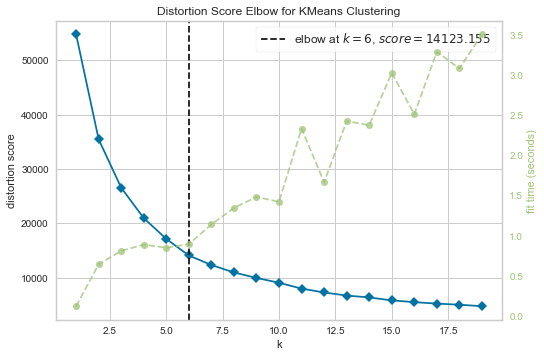

In [128]:
# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,20))

visualizer.fit(data_product_cluster)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

## Apply K-Means on Full Dataset

In [143]:
kmeans = KMeans(n_clusters = 4, n_jobs = -1, verbose = 10)
data_pred_product = kmeans.fit_predict(data_product_cluster)

In [144]:
product_label = pd.DataFrame(data_pred_product)

In [145]:
product_label["product_id"] = data_product["product_id"]

In [146]:
data_product_cluster["labels"] = product_label[0]

In [147]:
data_product_cluster["category_id"] = data_product["category_id"]

In [148]:
data_product_gp = data_product_cluster.groupby(["labels"]).agg({"View-Cart": "mean", "Cart-Purchase": "mean", "View-Purchase": "mean", "Cart-Remove": "mean"})

In [149]:
data_product_gp

,View-Cart,Cart-Purchase,View-Purchase,Cart-Remove
labels,,,,
0,0.157361,0.079428,0.022385,0.127114
1,1.566178,0.190630,0.297259,0.695618
2,4.521311,0.203027,0.906739,0.628425
3,0.566957,0.175737,0.102423,0.857518


- 0: Not Popular
- 1: Protential
- 2: Popular - Directly Purchase
- 3: Popular - Purchase from Cart

In [150]:
data_product_cluster["labels"].replace({0: "Not Popular Category", 1: "Protential Popular Category", 2: "Popular Category(Cart)", 3: "Popular Category(View)"}, inplace=True)

In [153]:
product_label[0].replace({0: "Not Popular Category", 1: "Protential Popular Category", 2: "Popular Category(Cart)", 3: "Popular Category(View)"}, inplace=True)

In [170]:
data_product_cluster["product_id"] = data_product["product_id"]

In [173]:
data_product_cluster

,View-Cart,Cart-Purchase,View-Purchase,Cart-Remove,labels,category_id,product_id
0,0.093750,0.333333,0.031250,0.333333,Not Popular Category,1487580004807082827,5916194
1,0.131148,0.375000,0.049180,0.250000,Not Popular Category,1487580004807082827,5916195
2,0.000000,0.000000,0.000000,0.000000,Not Popular Category,1487580004832248652,5706112
3,0.259259,0.079365,0.020576,0.793651,Popular Category(View),1487580004832248652,5706113
4,0.561538,0.109589,0.061538,0.684932,Popular Category(View),1487580004832248652,5706114
...,...,...,...,...,...,...,...
56184,0.000000,0.000000,0.000000,0.000000,Not Popular Category,2242903426784559183,5929661
56185,0.227273,0.000000,0.000000,0.600000,Popular Category(View),2242903426784559183,5929662
56186,0.375000,0.000000,0.000000,0.666667,Popular Category(View),2242903426784559183,5929663
56187,0.285714,0.500000,0.142857,0.500000,Popular Category(View),2242903426784559183,5929671


In [155]:
product_label

,0,product_id
0,Not Popular Category,5916194
1,Not Popular Category,5916195
2,Not Popular Category,5706112
3,Popular Category(View),5706113
4,Popular Category(View),5706114
...,...,...
56184,Not Popular Category,5929661
56185,Popular Category(View),5929662
56186,Popular Category(View),5929663
56187,Popular Category(View),5929671


In [174]:
data_product_cluster

,View-Cart,Cart-Purchase,View-Purchase,Cart-Remove,labels,category_id,product_id
0,0.093750,0.333333,0.031250,0.333333,Not Popular Category,1487580004807082827,5916194
1,0.131148,0.375000,0.049180,0.250000,Not Popular Category,1487580004807082827,5916195
2,0.000000,0.000000,0.000000,0.000000,Not Popular Category,1487580004832248652,5706112
3,0.259259,0.079365,0.020576,0.793651,Popular Category(View),1487580004832248652,5706113
4,0.561538,0.109589,0.061538,0.684932,Popular Category(View),1487580004832248652,5706114
...,...,...,...,...,...,...,...
56184,0.000000,0.000000,0.000000,0.000000,Not Popular Category,2242903426784559183,5929661
56185,0.227273,0.000000,0.000000,0.600000,Popular Category(View),2242903426784559183,5929662
56186,0.375000,0.000000,0.000000,0.666667,Popular Category(View),2242903426784559183,5929663
56187,0.285714,0.500000,0.142857,0.500000,Popular Category(View),2242903426784559183,5929671


In [ ]:
data3_clean = pd.DataFrame(data3["category_id"])
data3_clean["View-Cart"] = data3["View-Cart"]
data3_clean["Cart-Purchase"] = data3["Cart-Purchase"]
data3_clean["View-Purchase"] = data3["View-Purchase"]
data3_clean["Cart-Remove"] = data3["Cart-Remove"]



In [194]:
category_label = pd.read_csv("category_label.csv")
category_label

,Unnamed: 0,category_id,label
0,0,1487580004807082827,Not Popular Category
1,1,1487580004832248652,Protential Popular Category
2,2,1487580004857414477,Protential Popular Category
3,3,1487580004882580302,Protential Popular Category
4,4,1487580004916134735,Protential Popular Category
...,...,...,...
520,520,2222113024708182273,Not Popular Category
521,521,2235524494015856752,Not Popular Category
522,522,2235524499216793855,Not Popular Category
523,523,2235524499636224267,Not Popular Category


In [195]:
category_label["category_label"] = category_label["label"]
del category_label["label"]

In [196]:
data_product_cluster = pd.merge(data_product_cluster, category_label, how='inner', on='category_id')

In [198]:
data_product_cluster
del data_product_cluster["Unnamed: 0"]

In [199]:
data_product_cluster

,View-Cart,Cart-Purchase,View-Purchase,Cart-Remove,labels,category_id,product_id,category_label
0,0.093750,0.333333,0.031250,0.333333,Not Popular Category,1487580004807082827,5916194,Not Popular Category
1,0.131148,0.375000,0.049180,0.250000,Not Popular Category,1487580004807082827,5916195,Not Popular Category
2,0.000000,0.000000,0.000000,0.000000,Not Popular Category,1487580004832248652,5706112,Protential Popular Category
3,0.259259,0.079365,0.020576,0.793651,Popular Category(View),1487580004832248652,5706113,Protential Popular Category
4,0.561538,0.109589,0.061538,0.684932,Popular Category(View),1487580004832248652,5706114,Protential Popular Category
...,...,...,...,...,...,...,...,...
56184,0.000000,0.000000,0.000000,0.000000,Not Popular Category,2242903426784559183,5929661,Not Popular Category
56185,0.227273,0.000000,0.000000,0.600000,Popular Category(View),2242903426784559183,5929662,Not Popular Category
56186,0.375000,0.000000,0.000000,0.666667,Popular Category(View),2242903426784559183,5929663,Not Popular Category
56187,0.285714,0.500000,0.142857,0.500000,Popular Category(View),2242903426784559183,5929671,Not Popular Category


In [214]:
data_product_cluster.to_csv("../data/product_cluster.csv")